In [2]:
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
import cv2
import glob
import os
import tensorflow as tf

In [3]:
data_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"
data_path = tf.keras.utils.get_file('flower_photos',data_url,cache_dir='.',untar=True)

In [4]:
data_path

'.\\datasets\\flower_photos'

In [5]:
gullar = [i for i in glob.glob(data_path+"//*//*")]

In [6]:
gullar[:6]

['.\\datasets\\flower_photos\\daisy\\100080576_f52e8ee070_n.jpg',
 '.\\datasets\\flower_photos\\daisy\\10140303196_b88d3d6cec.jpg',
 '.\\datasets\\flower_photos\\daisy\\10172379554_b296050f82_n.jpg',
 '.\\datasets\\flower_photos\\daisy\\10172567486_2748826a8b.jpg',
 '.\\datasets\\flower_photos\\daisy\\10172636503_21bededa75_n.jpg',
 '.\\datasets\\flower_photos\\daisy\\102841525_bd6628ae3c.jpg']

In [7]:
len(gullar)

3670

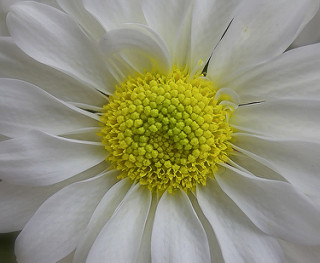

In [8]:
import PIL
PIL.Image.open(gullar[0])

In [9]:
gullar_roza = [i for i in glob.glob(data_path+"//roses//*")]

In [10]:
PIL.Image.open(gullar_roza[21])
print(len(gullar_roza))

641


In [11]:
gullar_dict = {
    'daisy': [i for i in glob.glob(data_path+"//daisy//*")],
    'dandelion': [i for i in glob.glob(data_path+"//dandelion//*")],
    'roses': [i for i in glob.glob(data_path+"//roses//*")],
    'sunflowers': [i for i in glob.glob(data_path+"//sunflowers//*")],
    'tulips': [i for i in glob.glob(data_path+"//tulips//*")],
}

In [12]:
gullar_dict['daisy'][0]

'.\\datasets\\flower_photos//daisy\\100080576_f52e8ee070_n.jpg'

In [13]:
gullar_label = {
    'daisy': 0,
    'dandelion': 1,
    'roses': 2,
    'sunflowers': 3,
    'tulips': 4,
}

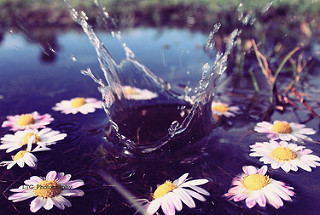

In [14]:
PIL.Image.open(gullar_dict['daisy'][2])

In [15]:
gul_test = cv2.imread(gullar_dict['roses'][8])

In [16]:
gul_test.shape

(241, 320, 3)

In [17]:
x_data = []
y_data = []

for i,j in gullar_dict.items():
    for rasm in j:
        rasm = cv2.imread(rasm)
        rasm = cv2.resize(rasm,(180,180))
        x_data.append(rasm)
        y_data.append(gullar_label[i])

In [18]:
x_data = np.array(x_data)
y_data = np.array(y_data)

In [19]:
from sklearn.model_selection import train_test_split

In [20]:
x_train, x_test,y_train,y_test = train_test_split(x_data,y_data,test_size=0.2,random_state=42)

In [21]:
x_train.shape

(2936, 180, 180, 3)

In [22]:
y_train.shape

(2936,)

In [23]:
x_test.shape

(734, 180, 180, 3)

In [24]:
y_test.shape

(734,)

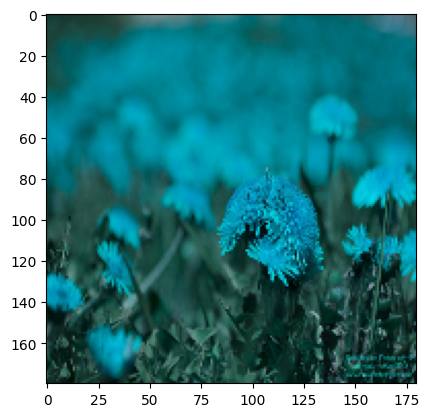

In [25]:
plt.imshow(x_train[0])

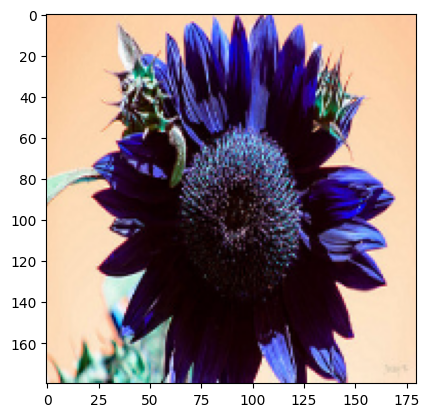

In [26]:
plt.imshow(x_train[1])

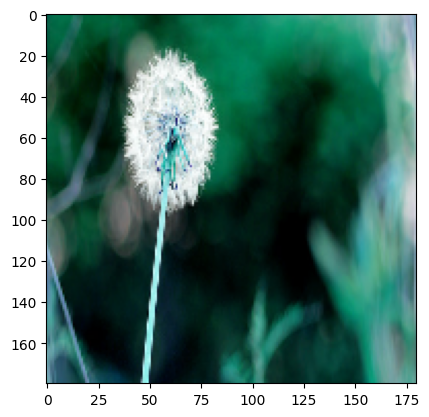

In [27]:
plt.imshow(x_train[2])

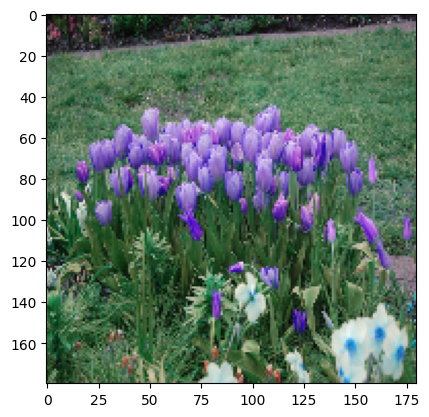

In [28]:
plt.imshow(x_train[3])

In [29]:
x_train_normal = x_train / 255
x_test_normal = x_test / 255

In [30]:
model = keras.Sequential([
    keras.layers.Conv2D(16,(3,3),padding='same',activation='relu',input_shape=(180,180,3)),
    keras.layers.MaxPooling2D(2,2),

    keras.layers.Conv2D(32,(3,3),padding='same',activation='relu'),
    keras.layers.MaxPooling2D(2,2),

    keras.layers.Conv2D(64,(3,3),padding='same',activation='relu'),
    keras.layers.MaxPooling2D(2,2),

    keras.layers.Flatten(),
    keras.layers.Dense(128,activation='relu'),
    keras.layers.Dense(5,activation='softmax')
])

In [31]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
model.fit(x_train_normal,y_train,epochs=15)

Epoch 1/15
92/92 [==============================] - 47s 486ms/step - loss: 1.3396 - accuracy: 0.4394
Epoch 2/15
92/92 [==============================] - 46s 502ms/step - loss: 0.9737 - accuracy: 0.6240
Epoch 3/15
92/92 [==============================] - 38s 409ms/step - loss: 0.7868 - accuracy: 0.6975
Epoch 4/15
92/92 [==============================] - 29s 318ms/step - loss: 0.5865 - accuracy: 0.7851
Epoch 5/15
92/92 [==============================] - 29s 309ms/step - loss: 0.3486 - accuracy: 0.8747
Epoch 6/15
92/92 [==============================] - 39s 423ms/step - loss: 0.1743 - accuracy: 0.9465
Epoch 7/15
92/92 [==============================] - 43s 469ms/step - loss: 0.1048 - accuracy: 0.9700
Epoch 8/15
92/92 [==============================] - 40s 436ms/step - loss: 0.0597 - accuracy: 0.9826
Epoch 9/15
92/92 [==============================] - 43s 472ms/step - loss: 0.0333 - accuracy: 0.9911
Epoch 10/15
92/92 [==============================] - 43s 469ms/step - loss: 0.0218 - accura

In [32]:
model.evaluate(x_test_normal,y_test)

23/23 [==============================] - 3s 126ms/step - loss: 2.1385 - accuracy: 0.6035


[2.138485908508301, 0.6035422086715698]

In [33]:
data_augmentation = keras.Sequential([
    keras.layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
    keras.layers.experimental.preprocessing.RandomZoom(0.1),
    keras.layers.experimental.preprocessing.RandomRotation(0.1)
])

In [35]:
model = keras.Sequential([
    data_augmentation,
    keras.layers.Conv2D(16,(3,3),padding='same',activation='relu',input_shape=(180,180,3)),
    keras.layers.MaxPooling2D(2,2),

    keras.layers.Conv2D(32,(3,3),padding='same',activation='relu'),
    keras.layers.MaxPooling2D(2,2),

    keras.layers.Conv2D(64,(3,3),padding='same',activation='relu'),
    keras.layers.MaxPooling2D(2,2),

    keras.layers.Flatten(),
    keras.layers.Dense(128,activation='relu'),
    keras.layers.Dense(5,activation='sigmoid')
])

In [40]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
model.fit(x_train_normal,y_train,epochs=15)

Epoch 1/15
92/92 [==============================] - 47s 495ms/step - loss: 1.3472 - accuracy: 0.4172
Epoch 2/15
92/92 [==============================] - 53s 581ms/step - loss: 1.0536 - accuracy: 0.5834
Epoch 3/15
92/92 [==============================] - 52s 560ms/step - loss: 0.9470 - accuracy: 0.6250
Epoch 4/15
92/92 [==============================] - 51s 559ms/step - loss: 0.8997 - accuracy: 0.6512
Epoch 5/15
92/92 [==============================] - 48s 523ms/step - loss: 0.8370 - accuracy: 0.6747
Epoch 6/15
92/92 [==============================] - 49s 529ms/step - loss: 0.8142 - accuracy: 0.6901
Epoch 7/15
92/92 [==============================] - 33s 364ms/step - loss: 0.7762 - accuracy: 0.7010
Epoch 8/15
92/92 [==============================] - 33s 362ms/step - loss: 0.7406 - accuracy: 0.7047
Epoch 9/15
92/92 [==============================] - 34s 365ms/step - loss: 0.7255 - accuracy: 0.7210
Epoch 10/15
92/92 [==============================] - 36s 389ms/step - loss: 0.6848 - accura

In [41]:
model.evaluate(x_test_normal,y_test)

23/23 [==============================] - 1s 57ms/step - loss: 0.9111 - accuracy: 0.6730


[0.9110838174819946, 0.6730245351791382]